In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 5000

data = {
    "transaction_id": range(1, n+1),
    "amount": np.concatenate([
        np.random.normal(200, 50, n-50),
        np.random.normal(1000, 300, 50)
    ]),
    "time": np.random.randint(0, 24, n),
    "merchant": np.random.choice(["grocery", "electronics", "restaurant", "travel"], n),
    "location": np.random.choice(["Mumbai", "Pune", "Delhi", "Bangalore"], n)
}

df = pd.DataFrame(data)

df.to_csv("transactions.csv", index=False)

df.head()


,transaction_id,amount,time,merchant,location
0,1,224.835708,7,grocery,Mumbai
1,2,193.086785,0,grocery,Pune
2,3,232.384427,23,travel,Pune
3,4,276.151493,21,grocery,Delhi
4,5,188.292331,3,electronics,Mumbai


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
import joblib


In [3]:
df = pd.read_csv("transactions.csv")

print(df.shape)
df.head()


(5000, 5)


,transaction_id,amount,time,merchant,location
0,1,224.835708,7,grocery,Mumbai
1,2,193.086785,0,grocery,Pune
2,3,232.384427,23,travel,Pune
3,4,276.151493,21,grocery,Delhi
4,5,188.292331,3,electronics,Mumbai


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  5000 non-null   int64  
 1   amount          5000 non-null   float64
 2   time            5000 non-null   int64  
 3   merchant        5000 non-null   object 
 4   location        5000 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 195.4+ KB


,transaction_id,amount,time
count,5000.000000,5000.000000,5000.000000
mean,2500.500000,208.506960,11.603200
std,1443.520003,101.462115,6.896786
min,1.000000,37.936633,0.000000
25%,1250.750000,167.426821,6.000000
50%,2500.500000,201.127419,12.000000
75%,3750.250000,234.202696,17.250000
max,5000.000000,1933.873060,23.000000


In [5]:
X = df[['amount', 'time']]


In [6]:
model = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42
)

df['anomaly'] = model.fit_predict(X)


In [7]:
df['anomaly_label'] = df['anomaly'].map({
    1: "Normal",
    -1: "Anomaly"
})

df['anomaly_label'].value_counts()


anomaly_label
Normal     4900
Anomaly     100
Name: count, dtype: int64

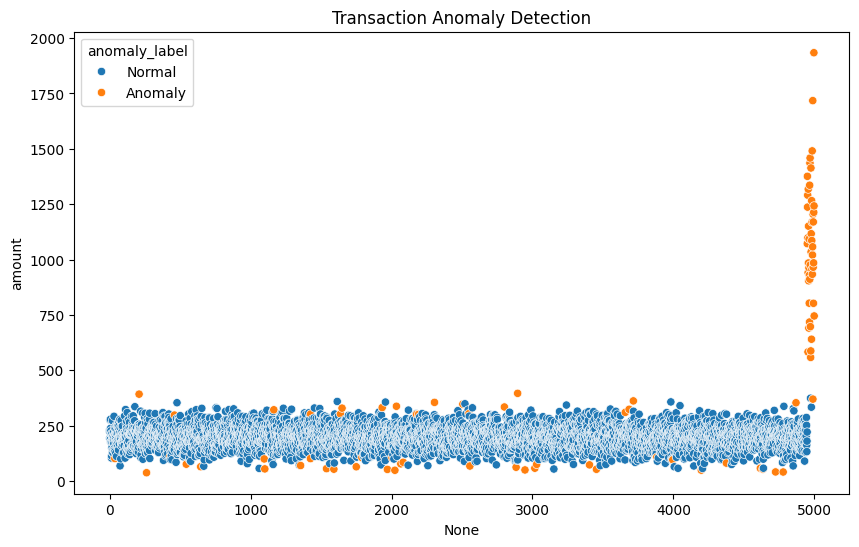

In [8]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x=df.index,
    y=df['amount'],
    hue=df['anomaly_label']
)

plt.title("Transaction Anomaly Detection")
plt.show()


In [9]:
anomalies = df[df['anomaly_label'] == "Anomaly"]

print("Total anomalies detected:", len(anomalies))

anomalies.head()


Total anomalies detected: 100


,transaction_id,amount,time,merchant,location,anomaly,anomaly_label
37,38,102.016494,23,travel,Pune,-1,Anomaly
209,210,392.636575,2,travel,Bangalore,-1,Anomaly
262,263,37.936633,11,electronics,Delhi,-1,Anomaly
429,430,112.063026,0,travel,Mumbai,-1,Anomaly
460,461,298.236257,23,restaurant,Delhi,-1,Anomaly


In [10]:
joblib.dump(model, "best_model.pkl")


['best_model.pkl']